# SEL0634 - Laboratório de Robôs Manipuladores

As aulas de laboratório utilizam as seguintes bibliotecas:

*   [Spatial Maths for Python](https://github.com/petercorke/spatialmath-python#readme)
*   [Robotics Toolbox for Python](https://github.com/petercorke/robotics-toolbox-python)

## Aula 1 - Descrições Espaciais e Transformações

A biblioteca [Spatial Maths for Python](https://github.com/petercorke/spatialmath-python#readme) disponibiliza classes para representar posição e orientação no espaço 3D e 2D. Recomenda-se a consulta à [documentação da biblioteca](https://petercorke.github.io/spatialmath-python/), e aos [notebooks de introdução](https://github.com/petercorke/spatialmath-python/tree/master/notebooks):

*   [gentle-introduction.ipynb](https://github.com/petercorke/spatialmath-python/blob/master/notebooks/gentle-introduction.ipynb)
*   [introduction.ipynb](https://github.com/petercorke/spatialmath-python/blob/master/notebooks/introduction.ipynb)

Exemplos extraídos da documentação e dos notebooks da biblioteca são mostrados a seguir.


### Instalação da biblioteca 

O comando a seguir é usado para instalar a biblioteca para uso em um notebook no [Google Colab](https://colab.research.google.com/) ou [Binder](https://mybinder.org/):

In [1]:
!pip install spatialmath-python

     |████████████████████████████████| 153kB 5.5MB/s 
     |████████████████████████████████| 61kB 4.1MB/s 
  Created wheel for spatialmath-python: filename=spatialmath_python-0.9.6-cp37-none-any.whl size=159519 sha256=2437b958762a4670dbf11d51f3fd5072f3adc483d73e7618f2efb432c7700edb
  Stored in directory: /root/.cache/pip/wheels/a8/9f/51/01ce301eeaa8edbfb34f13534331ad90918a0f4b63931c593c
  Created wheel for colored: filename=colored-1.4.2-cp37-none-any.whl size=14003 sha256=322ed0e15cf6bae43a48ac7bedb5c522bf87d2060b595a2ef84aa40eae06790f
  Stored in directory: /root/.cache/pip/wheels/ec/10/5e/d17d5ef644e1051a753bd98f3796789ec39bc3337cd36637f3
  Created wheel for ansitable: filename=ansitable-0.9.5-cp37-none-any.whl size=12176 sha256=63825acab3143bf8451c8e260c0461e0704a685807b5bcd8656b221c98316775
  Stored in directory: /root/.cache/pip/wheels/48/66/3c/ff4f575272853a6d2faf784970b7d3ba3bad49d73794357d94
Successfully built spatialmath-python colored ansitable


A sequencia de comandos a seguir carrega as bibliotecas que serão usadas:

In [3]:
import numpy as np
from spatialmath import *
from math import pi

import matplotlib.pyplot as plt
# no Binder utilizar essa linha
# %matplotlib notebook  
# no Colab utilizar essa linha
%matplotlib inline  


### Representação de Coordenadas 3D

#### Matriz de rotação

Uma das formas de representar orientação no espaço 3D é através de matrizes de rotação $3\times3$, que pertencem ao conjunto $SO(3)$. 

A biblioteca fornece funções para definir as matrizes básicas de rotação. Por exemplo, a matriz de rotação de $\pi/4$ radianos em torno do eixo $x$ é definida por:

In [4]:
R1 = SO3.Rx(pi/4)

Seu conteúdo pode ser mostrado:

In [5]:
R1

   1         0         0         
   0         0.7071   -0.7071    
   0         0.7071    0.7071    


Para definir uma matriz utilizando ângulos em graus:

In [6]:
SO3.Rx(45,'deg')

   1         0         0         
   0         0.7071   -0.7071    
   0         0.7071    0.7071    


Para compor matrizes de rotação, a biblioteca em Python utiliza o operador * 

In [7]:
R1*R1

   1         0         0         
   0         0        -1         
   0         1         0         


Também é possível utilizar o operador exponencial para repetir rotações iguais em sequencia:

In [8]:
R1**2

   1         0         0         
   0         0        -1         
   0         1         0         


Uma rotação de $\pi/4$ em torno do eixo X seguida de uma outra rotação de $\pi/4$ em torno do eixo X resulta em uma rotação de $\pi/2$ em torno do eixo X. A soma dos ângulos é possível pois as duas rotações consecutivas são aplicadas em relação ao mesmo eixo. 

É possivel verificar esse resultado:

In [9]:
SO3.Rx(pi/2)

   1         0         0         
   0         0        -1         
   0         1         0         


Uma matriz de rotação descreve a orientação de um sistema de coordenadas. Para visualizar o sistema de coordendas descrito pela matriz de rotação:

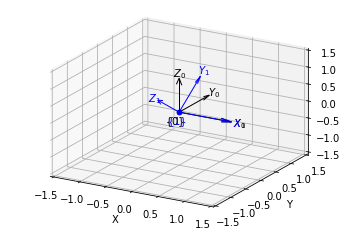

In [10]:
fig = plt.figure() # cria uma nova figura
SE3().plot(frame='0', dims=[-1.5,1.5], color='black') # mostra o sistema de coordenadas para rotação zero
R1.plot(frame='1') # mostra o sistema de coordenadas com orientação dada por R1

A matriz de rotação não possui propriedade comutativa. 

Veja que $ R_x(\pi/2) R_y(\pi/2)$ é diferente de $ R_y(\pi/2) R_x(\pi/2)$:



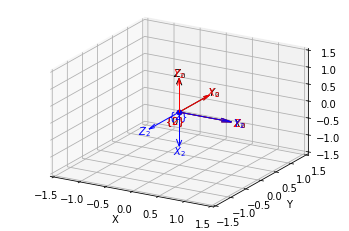

In [11]:
R2 = SO3.Rx(pi/2)*SO3.Ry(pi/2)
R3 = SO3.Ry(pi/2)*SO3.Rx(pi/2)
fig = plt.figure() # cria uma nova figura
SE3().plot(frame='0', dims=[-1.5,1.5], color='black') # mostra o sistema de coordenadas para rotação zero
R2.plot(frame='2', color='red')
R3.plot(frame='2', color='blue')

Uma forma de definir uma rotação 3D é através dos ângulos roll, pitch, yaw. 

Para definir uma rotação com ângulo roll de $10^o$, ângulo pitch de $20^o$ e ângulo yaw de $30^o$ utiliza-se o comando:

In [14]:
R4 = SO3.RPY([10, 20, 30], unit='deg')
R4

   0.8138   -0.441     0.3785    
   0.4698    0.8826    0.01803   
  -0.342     0.1632    0.9254    


A matriz de rotação resultante equivale à aplicação de uma rotação de $30^o$ em torno do eixo $Z$ (yaw), seguida de uma rotação de $20^o$ em torno do eixo $Y$ (pitch), seguida de uma rotação de $10^o$ em torno do eixo $X$, que é a convenção $ZYX$ para rotação roll-pitch-yaw. Nessa convenção, a sequencia de rotações $ZYX$ é aplicada em relação ao *sistema de coordenadas atual*, ou seja, primeiro o sistema de coordendas inicial é rotacionado em torno do eixo $Z$. Em seguida, é aplicada uma rotação em torno do eixo $Y$ atual, ou seja, do eixo $Y$ do sistema resultande da primeira rotação. Finalmente, é aplicada uma rotação em torno do eixo $X$ atual, que é o eixo $X$ do sistema resultante das rotações anteriores. Perceba que cada nova rotação é **pós-multiplicada** ao resultado já obtido.

In [15]:
SO3.Rz(30,'deg')*SO3.Ry(20,'deg')*SO3.Rx(10,'deg')

   0.8138   -0.441     0.3785    
   0.4698    0.8826    0.01803   
  -0.342     0.1632    0.9254    


A sequencia anterior também pode ser interpretada como sendo a composição de uma sequencia de rotações na ordem $XYZ$ definidas em relação ao *sistema de coordenadas fixo* inicial. Ou seja, primeiro aplica-se a rotação em torno do eixo $X$ do sistema inicial. O sistema resultante é então rotacionado em torno do eixo $Y$ do sistema inicial. Finalmente, o sistema resultante das duas rotações anteriores é rotacionado em torno do eixo $Z$ do sistema inicial. Perceba que todas as rotações foram definidas em torno do mesmo sistema, por isso, é chamado de composição de rotações em relação ao um *sistema de coordenadas fixo*, e cada nova rotação é **pré-multiplicada** ao resultado obtido.

Para visualizar a rotação resultante:

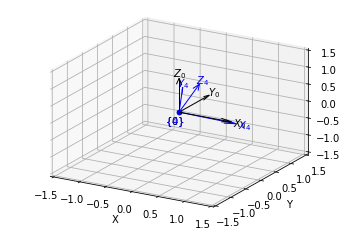

In [16]:
fig = plt.figure() # cria uma nova figura
SE3().plot(frame='0', dims=[-1.5,1.5], color='black') # mostra o sistema de coordenadas para rotação zero
R4.plot(frame='4') # mostra o sistema de coordenadas com orientação dada por R4

É possível obter os ângulos roll-pitch-yaw em radianos a partir da matrix de rotação:

In [18]:
R4.rpy()

array([0.17453293, 0.34906585, 0.52359878])

##### Propriedades

O objeto que representa a matriz de rotação em Python possui algumas propriedades.

As colunas da matriz de rotação podem ser acessadas individualmente considerando $\mathbf{R} = [n, o, a]$, onde $n$, $o$ e $a$ são vetores tridimensionais.

In [19]:
R2.n

array([ 6.123234e-17,  1.000000e+00, -6.123234e-17])

In [20]:
R2.o

array([0.000000e+00, 6.123234e-17, 1.000000e+00])

In [21]:
R2.a

array([ 1.00000000e+00, -6.12323400e-17,  3.74939946e-33])

A inversa da matriz de rotação, que é igual a sua transposta, pode ser obtida por:

In [22]:
R2.inv()

   0         1         0         
   0         0         1         
   1         0         0         


A dimensão da matriz pode ser obtida por:

In [23]:
R2.shape

(3, 3)

A ordem da matriz é dada por:

In [24]:
R2.N

3

que indica que a matriz opera no espaço 3D.

Algumas outras propriedades são comuns a outras classes da biblioteca:

In [25]:
[R1.isSE, R1.isSO, R1.isrot(), R1.ishom(), R1.isrot2(), R1.ishom2()]

[False, True, True, False, False, False]

#### Representando Posições

Um movimento rígido composto de uma rotação e translação pode ser descrito por uma matriz de transformação homogênea, matriz $4\times4$ que pertence ao conjunto $SE(3)$.

A translação de $1$ na direção $x$, $2$ na direção $y$, e $3$ na direção $z$ pode ser definida pelo seguinte comando da biblioteca: 

In [27]:
T1 = SE3(1,2,3)
T1

   1         0         0         1         
   0         1         0         2         
   0         0         1         3         
   0         0         0         1         


onde a matriz de rotação é mostrada em vermelho, o vetor de translação em azul, e as constantes da linha inferior em cinza. 

A matriz de rotação é a matriz identidade pois foi definida apenas uma translação.

O vetor de translação pode ser também interpretado como a origem do sistema em relação a um referêncial inercial.

Para visualizar o sistema de coordenadas definido por $T1$:

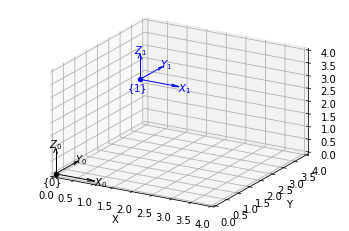

In [28]:
fig = plt.figure() # cria uma nova figura
SE3().plot(frame='0', dims=[0,4], color='black') # mostra o sistema de coordenadas para rotação zero
T1.plot(frame='1') 

Definindo uma outra translação:

In [33]:
T12 = SE3(2,-1,-2)
T12

   1         0         0         2         
   0         1         0        -1         
   0         0         1        -2         
   0         0         0         1         


Podemos compor a translação $T1$ com a translação adicional $T12$, multiplicamos as duas transformações homogêneas:

In [34]:
T2 = T1*T12
T2

   1         0         0         3         
   0         1         0         1         
   0         0         1         1         
   0         0         0         1         


A sequencia de multiplicação aplicada acima, $T1*T12$, significa que a transformação $T12$ é definida em relação ao sistema de coordenadas resultante da transformação $T1$, ou seja, o *sistema de coordenadas atual*. 

Perceba que ao compor às transformações homogêneas, o vetor de translação resultante (quarta coluna da matriz $T2$) é igual a soma da translação definida em $T1$ com a translação definida em $T12$. Esse resultado foi obtido pois não houve rotação definida nessas transformações.

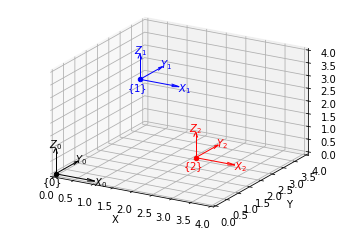

In [32]:
fig = plt.figure() # cria uma nova figura
SE3().plot(frame='0', dims=[0,4], color='black') # mostra o sistema de coordenadas para rotação zero
T1.plot(frame='1') 
T2.plot(frame='2', color='red') 

#### Representando uma Pose

De forma mais geral, a matriz de transformação homogênea representa um movimento de translação 3D e rotação 3D, que definem a pose de um sistema de coordendas. 

Na biblioteca, um movimento rígido 3D que representa a pose de um sistema de coordenadas, pode ser composto por uma translação pura seguida de uma rotação pura:

In [36]:
T1 = SE3(1, 2, 3)* SE3.Rx(30, 'deg')
T1

   1         0         0         1         
   0         0.866    -0.5       2         
   0         0.5       0.866     3         
   0         0         0         1         


O sistema resultante pode ser visualizado:

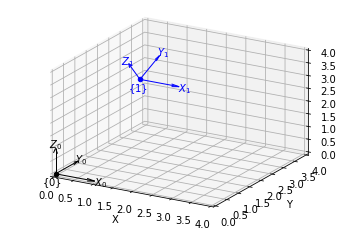

In [37]:
plt.figure() 
SE3().plot(frame='0', dims=[0,4], color='black')
T1.plot(frame='1')

##### Propriedades

As colunas da matriz de rotação representada na transformação homogênea podem ser acessadas:

In [38]:
T1.o

array([0.       , 0.8660254, 0.5      ])

A inversa da matriz de transformação homogênea é dada por:

In [39]:
T1.inv()

   1         0         0        -1         
   0         0.866     0.5      -3.232     
   0        -0.5       0.866    -1.598     
   0         0         0         1         


A matrix de rotação pode ser acessada como um array da biblioteca numpy:

In [40]:
T1.R

array([[ 1.       ,  0.       ,  0.       ],
       [ 0.       ,  0.8660254, -0.5      ],
       [ 0.       ,  0.5      ,  0.8660254]])

O vetor de translação pode ser acessado como um array da biblioteca numpy:

In [41]:
T1.t

array([1., 2., 3.])

A dimensão da matriz é dada por:

In [42]:
T1.shape

(4, 4)

e a ordem:

In [43]:
T1.N

3

que indica que a matriz opera no espaço 3D.

As propriedades comuns às outras classes também podem ser verificadas:

In [44]:
[T1.isSE, T1.isSO, T1.isrot(), T1.ishom(), T1.isrot2(), T1.ishom2()]

[True, False, False, True, False, False]

### Transformando pontos

Considere que o seguinte conjunto de pontos definem os vértices de um cubo:

In [46]:
P = np.array([[-1, 1, 1, -1, -1, 1, 1, -1], [-1, -1, 1, 1, -1, -1, 1, 1], [-1, -1, -1, -1, 1, 1, 1, 1]])
P

array([[-1,  1,  1, -1, -1,  1,  1, -1],
       [-1, -1,  1,  1, -1, -1,  1,  1],
       [-1, -1, -1, -1,  1,  1,  1,  1]])

Os pontos $^AP_i$ são definidos em relação a um sistema de coordenadas de referência fixo no corpo $\{A\}$. 

A transformação homogênea $^0T_A$ define a pose do sistema de coordenadas do corpo $\{A\}$ em relação ao sistema de coordenadas inercial $\{0\}$ (sistema de coordenadas do mundo).

A coordenada dos pontos descrita no sistema de coordenadas do mundo $^0P_i$ é dada por:

$$ {^0P_i} = {^0T_A} {^AP_i} $$

Usando a biblioteca:

In [47]:
Q = T1*P

Que pode ser visualizado por:

In [49]:
def plot_cubo(cubo,grafico):
  grafico.scatter(xs=cubo[0], ys=cubo[1], zs=cubo[2], s=20)  # draw vertices
  # draw lines joining the vertices
  lines = [[0,1,5,6], [1,2,6,7], [2,3,7,4], [3,0,4,5]]
  for line in lines:
      grafico.plot([cubo[0,i] for i in line], [cubo[1,i] for i in line], [cubo[2,i] for i in line])

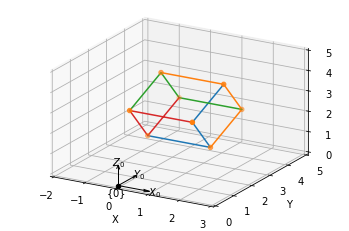

In [50]:
fig = plt.figure()
SE3().plot(frame='0', dims=[-2,3,0,5,0,5], color='black')
grafico = plt.gca()
plot_cubo(Q,grafico)
